## El problema original

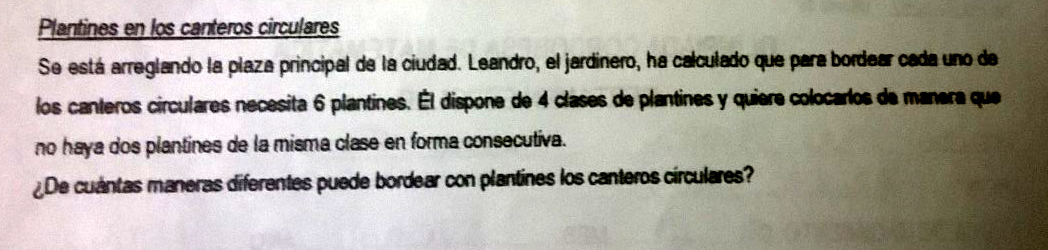

## El Problema (reversionado)

Se colocan 6 plantines en un cantero circular, tal que

1. Hay 4 clases de plantines.
2. No puede haber 2 plantines consecutivos de la misma clase.

¿De cuántas formas se puede hacer? (las rotaciones no son equivalentes)

**Solución**  732.

El problema se puede plantear de forma equivalente como:

*Se quieren pintar los vértices de un polígono de 6 lados con 4 colores sin que haya dos vértices consecutivos pintados del mismo color.*

O con más generalidad

*Se quieren pintar los vértices de un polígono de $n$ lados con $c$ colores sin que haya dos vértices consecutivos pintados del mismo color.* ($n>2$ ,$c \ge 2$).

## Solución fuerza bruta

Esta solución se obtiene averiguando odos los coloreos sin restricciones  y eliminando los que no cumple la consigna. Obviamente es una solución restringida a números bajos, pues el primer paso deja $c^n$ secuencias a ser analizadas,  y este número se hace muy gande rápidamente.


In [ ]:
from itertools import product

def pintar_poligono_fb(ver, col):
    # ver : entero >=2
    # col : cantidad de colores >= 2
    # post: devuelve la cantidad de formas de pintar los vértices de un polígono de ver lados
    #        con col colores sin que haya dos vértices consecutivos pintados del mismo color,
    #        sin equivalencia de rotaciones.
    # solución fuerza bruta: se calculan todas las posibilidades y se eliminan las que no sirven
    cls = list(range(col))
    cls_repetidos = [cls]*ver
    plt1 = list(product(*cls_repetidos))
    r0 = [list(w) for w in plt1]
    # r0 son todos los coloreos posibles, sin restricciones, sin equivalencia de rotaciones (es cls**n)
    r1 = []
    for u in r0:
        sirve = True
        for i in range(ver - 1):
            if u[i] == u[i + 1]:
                sirve = False
        if u[ver - 1] == u[0]:
            sirve = False
        if sirve:
            r1.append(u)
    # r1 son todos los coloreos posibles donde no puede haber dos colores iguales contiguos.
    # No hay equivalencia por rotaciones
    return len(r1)

pintar_poligono(6, 4)

##Planteo recursivo del problema


Sean $n, c \ge 2$ y dado $i$ tal que $0 \le i < c$,  primero calcularemos $f(n, i)$ que nos dice la cantidad de formas de pintar los vértices de una línea de $n$ puntos con $c$ colores,  con las siguientes restricciones:

1. el primer vértice tiene color 0;
2. no hay dos vértices consecutivos pintados del mismo color;
3. el último vértice tiene color $i$.

La solución al problema original es $4f(7, 0)$ pues identificando el primer y último vértice el valor  $f(7, 0)$ resuelve el problema de los 6 vértices cuando el primer vértice es 0.  Luego hay que multiplicar por la cantidad de colores para no tener restricciones en el primer vértice.


Se puede obtener $f$ de forma recursiva.
$$
\begin{align*}
f(2, 0) &= 0; & &\\
f(2, i)  &= 1&&\text{si } 0 < i < c \\
f(n, 0) &= \sum_{j=1}^{c-1}  f(n - 1, j)&&\text{si } n > 2    \\
f(n, i) &= f(n - 1, 0) + \sum_{1 \le j < c,\; j\not= i} f(n - 1, j)& &\text{si }  0 < i < c, \; n>2
\end{align*}
$$

Como, por una cuestión de simetría, $f(n, j) = f(n, k)$ para $1 \le j, k < c$ y $j \ne k$, obtenemos:

$$
\begin{align*}
f(2, 0) &= 0& &\\
f(2, i) &= 1& &\text{si } 0 < i < c \\
f(n, 0) &= (c-1) f(n - 1, 1)&&\text{si } n > 2  \\
f(n, i) &= f(n - 1, 0) + (c-2) f(n - 1, 1)& &\text{si }  0 < i < c, \; n>2
\end{align*}
$$

Observar que si $n>3$
$$
f(n, 1) = f(n - 1, 0) + (c-2)  f(n - 1, 1) = (c-1)f(n - 2, 1) + (c-2)  f(n - 1, 1)
$$
Y si $n=3$
$$
f(3,1) = f(2, 0) + (c-2)  f(2, 1) = c-2
$$

Luego si definimos $a_n = f(n,1)$ para $n \ge 2$ obtenemos para $a_n$  la siguiente recursión:

$$
\begin{align*}
a_2  &= 1; & & \\
a_3  &= c-2 &&      \tag{*}\\
a_n &= (c-2)a_{n-1} + (c-1)a_{n-2}& &\text{si }  n>3.
\end{align*}
$$

Entonces, la solución al problema con un polígono de $n>2$ vértices y $c$ colores es equivalente a contar todos los coloreos de $n$ vértices que empiecen con el color $0$  no terminen en $0$, esto es $(c-1)a_n$. Además debemos agregar todos los demás casos, cuando empiezan en color $i$, para $0 \le i < c$, es decir,  son $c$ casos, por lo tanto el resultado es $c(c-1)a_n$.

Ya esto nos permitiría resolver fácilmente el problema original ($c=4$): debemos calcular recursivamente $12a_6$ que lleva solamente 4 pasos.

También podemos codificar esta recursión



In [ ]:
def pintar_linea(n, c):
    assert type(n) == type(c) == int and n >= 2 and c >= 2, 'los parámetros deben ser enteros >= 2'
    # post:  pinta un linea de n puntos que empieza en 0 y termina en 1
    #        tq 2 vértices consecutivos no tiene el mismo color
    nro_casos = 0
    if n == 2:
        nro_casos = 1
    elif n == 3:
        nro_casos = c - 2
    else:
        nro_casos = (c - 2) * pintar_linea(n - 1, c) + (c - 1) * pintar_linea(n - 2, c)
    return nro_casos

def pintar_poligono(n, c):
    assert type(n) == type(c) == int and n >= 3 and c >= 2, 'los parámetros deben ser enteros en cierto rango'
    return 12 * pintar_linea(n, c)

pintar_poligono(6, 4)

Esta fórmula nos permite hacer casos más grandes que el original, lo que sería imposible por "fuerza bruta".

In [ ]:
pintar_poligono(20, 6)

Sin embargo, como en el caso de Fibonacci, una recursión doble "explota" rápidamente y  conviene implementar la función de otra forma

In [ ]:
def pintar_linea(n, c):
    assert type(n) == type(c) == int and n >= 2 and c >= 2, 'los parámetros deben ser enteros >= 2'
    # post:  pinta un linea de n puntos que empieza en 0 y termina en 1
    #        tq 2 vértices consecutivos no tiene el mismo color
    nro_casos = 0
    if n == 2:
        nro_casos = 1
    elif n == 3:
        nro_casos = c - 2
    else:
        ar = [1, 2]
        for i  in range(4, n + 1):
            ar = [ar[1], (c - 2) * ar[1] + (c - 1) * ar[0]]
        nro_casos = ar[1]
    return nro_casos

def pintar_poligono(n, c):
    assert type(n) == type(c) == int and n >= 3 and c >= 2, 'los parámetros deben ser enteros en cierto rango'
    return 12 * pintar_linea(n, c)

pintar_poligono(6, 4)

In [ ]:
nro_formas = pintar_poligono(4506, 15)
# averiguamos la cantidad de dígitos
import math
math.log10(nro_formas)

La cantidad de coloreos que puedo hacer de un polígono de 4506 vértices con  15 colores y cumpliendo la consigna es un número  de aproximadamente 5162 dígitos.

## Fórmula cerrada de la solución

Las  últimas funciones que usamos para implementar la solución del problema son muy eficientes y sirven para números "grandes". Sin embargo,  sería desable tener una fórmula cerrada para nuestro cálculo. ¿Es posible hallarla? Veremos que sí, pero se basa en resultados,  bastante generales, que permiten hallar una frórmula cerrada a partir de ciertas recursiones. En particular estos resultados se aplican a la fórmula (*). Para los detalles ver sección 4.7 del libro "Fundamentals of Algorithmics" de G. Brassard y P. Bratley, Prentice Hall, 1996. Usando estos resultado procedemos a encontrarla fórmula correspondiente a la recurrencia

$$
\begin{align*}
a_2  &= 1; & & \\
a_3  &= c-2 &&      \tag{*}\\
a_n &= (c-2)a_{n-1} + (c-1)a_{n-2}& &\text{si }  n>3.
\end{align*}
$$

Luego, para $n > 2$:
$$
a_n - (c-2)a_{n-1} - (c-1)a_{n-2} =0
$$
Por lo tanto,  el polinomio característico de la recursión es
$$
x^2 - (c-2)x - (c-1),
$$
cuyas raices son
$$
x_1, x_2 = \frac{c-2 \pm \sqrt{(c-2)^2 + 4(c-1) }}{2} = \frac{c-2 \pm \sqrt{c^2  }}{2} = -1, c-1
$$
Luego,
$$
a_n = A (-1)^n + B (c-1)^n,
$$
para $n \ge 2$. Calculamos $A$ y $B$ usando los valores iniciales $a_2=1$ y $a_3= c-2$:

$$
1 = A + B(c-1)^2 \\
c-2 = -A + B (c-1)^3.
$$

De estas ecuaciones se deduce que
$$
A = \frac1c,\quad B = \frac{1}{c(c-1)}.
$$

Por lo tanto
$$
a_n = \frac{(-1)^n}c +  \frac{(c-1)^{n-1}}{c} = \frac{(-1)^n + (c-1)^{n-1}}{c}.
$$
para $n \ge 2$.

Volviendo a la solución del problema de $n$ vértices y $c$ colores, si  $s_n$ es la cantidad de formas de colorear,  entonces $s_2=0$ y si $n >2$, $s_n$ es $a_n$ por la cantidad de inicios distintos, $c$ uno por color, por  la cantidad de finales distintos, $c-1$ uno por color menos el primer color. Es decir $s_n = c(c-1)a_n$, luego:

$$
s_2 = 0 \\
s_n =  (-1)^n(c-1) + (c-1)^{n}, \quad n> 2
$$

En  el caso $n=6$, $c=4$, el problema original, obtenemos
$$
s_6 =  3 + 3^{6} = 732.
$$

## Conclusión (solución óptima)

**Resultado.** *Sean $n>2$ ,$c \ge 2$. La cantidad de formas de  pintar los vértices de un polígono de $n$ lados con $c$ colores sin que haya dos vértices consecutivos pintados del mismo color es $(-1)^n(c-1) + (c-1)^{n}$.*

Esto lo podemos hacer con una claculadora o un programa extremadamente sencillo:

In [ ]:
def pintar_poligono(n, c):
    assert type(n) == type(c) == int and n >= 3 and c >= 2, 'los parámetros deben ser enteros en cierto rango'
    return (-1)**n * (c - 1) + (c - 1)**n

from math import log10
# averiguamos la cantidad de dígitos en ciertos casos
print(log10(pintar_poligono(10**5, 15))) # 100.000 de vértices,  15 colores
print(log10(pintar_poligono(10**6, 15))) # 1.000.000 de vértices,  15 colores

114612.80356782381
1146128.035678238


El límite para el cálculo está puesto en la capacidad de Python  para calcular $m^n$.

**Pregunta.** ¿Es posible obtener este resultado de manera combinatoria?